In [ ]:
 📌 Loan EMI Calculator – Project Notes

## 📝 Project Goal:
To build a simple **EMI (Equated Monthly Installment) Calculator** that:
- Takes loan details from user input
- Calculates fixed monthly payment (EMI)
- Displays total payable, total interest
- Optionally shows amortization schedule (month-wise breakdown)
- Shows graphical representation

---

## 📥 Inputs Required:
- **Principal (P)** – Total loan amount (e.g., ₹10,000)
- **Annual Interest Rate (r)** – e.g., 10%
- **Loan Tenure** – in years or months

Verna EMI calculator🧮


Enter your name: sai


⏳......⌛
Hi sai, Welcome to VERNA EMI CALCULATOR
Here you can calculate EMI, Interest etc.


Enter Principal Amount: ₹ 25000
Enter Interest rate (per year %):  12


Please choose the Tenure option:
1. Months
2. Years


Enter the option [1/2]:  1
Enter Number of Months:  12


Amount of EMI per month Exactly: 2221.22
Total Payment over tenure: ₹26654.64
Total Interest paid: ₹1654.64
---------------------------------------------------------------
    Month  Opening Balance (₹)  EMI (₹)  Interest (₹)  Closing Balance (₹)
0       1             25000.00  2221.22        250.00             23028.78
1       2             23028.78  2221.22        230.29             21037.85
2       3             21037.85  2221.22        210.38             19027.01
3       4             19027.01  2221.22        190.27             16996.06
4       5             16996.06  2221.22        169.96             14944.80
5       6             14944.80  2221.22        149.45             12873.03
6       7             12873.03  2221.22        128.73             10780.54
7       8             10780.54  2221.22        107.81              8667.12
8       9              8667.12  2221.22         86.67              6532.57
9      10              6532.57  2221.22         65.33              4376.68
10 

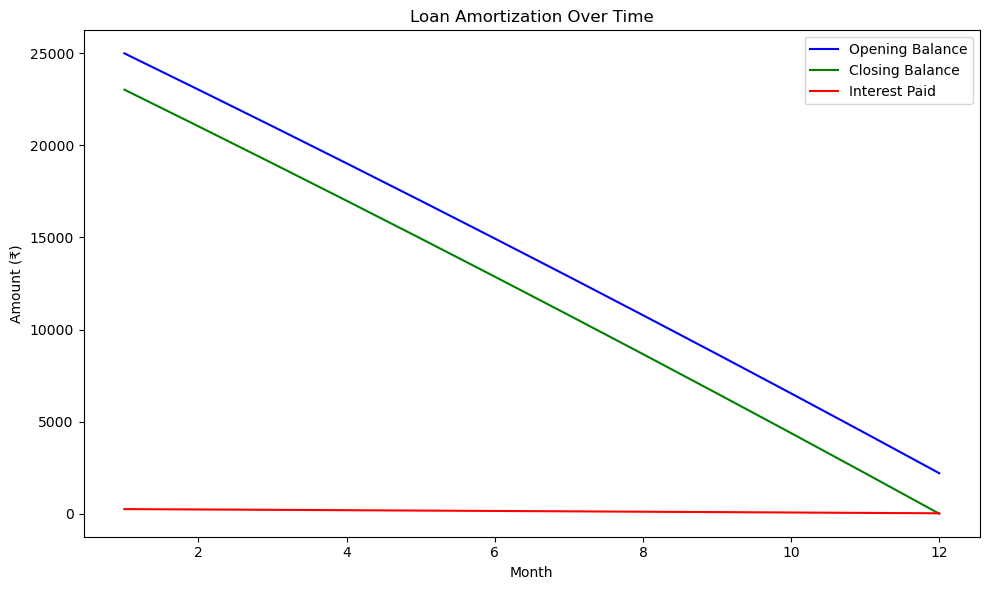

📁 Do you want to export this data to a CSV file? (y/n):  n


Skipping CSV export.


🔁 Do you want to try again? (y/n):  n


🙏 Thank you! Hope you enjoyed using the Verna EMI Calculator. See you again! 👋


In [1]:
#import libraries

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# main code 

def Simple_project():
    print("Verna EMI calculator🧮")
    name = input("Enter your name:")
    
    print("⏳......⌛")
    time.sleep(2)
    print(f"Hi {name}, Welcome to VERNA EMI CALCULATOR")
    print("Here you can calculate EMI, Interest etc.")
    
    while True:
        while True:
            try:
                time.sleep(1)
                principal = float(input("Enter Principal Amount: ₹"))
                if principal <= 0:
                    print("Please enter a positive amount.")
                    continue
                break
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
        
        while True:
            try:
                time.sleep(1)
                interest = float(input("Enter Interest rate (per year %): "))
                if interest <= 0:
                    print("Please enter a positive interest rate.")
                    continue
                break
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
        
        while True:
            print("Please choose the Tenure option:")
            print("1. Months")
            print("2. Years")
            try:
                time.sleep(1)
                user_choice = int(input("Enter the option [1/2]: "))
                if user_choice not in [1, 2]:
                    print("Please enter 1 or 2.")
                    continue
                break
            except ValueError:
                print("Invalid input! Please enter 1 or 2.")
        
        while True:
            try:
                if user_choice == 1:
                    time.sleep(1)
                    tenure = int(input("Enter Number of Months: "))
                else:
                    tenure = int(input("Enter Number of Years: "))
                    tenure = tenure * 12
                
                if tenure <= 0:
                    print("Please enter a positive number.")
                    continue
                break
            except ValueError:
                print("Invalid input! Please enter a numeric value and integer value.")
        
        Monthly_rate = interest/(12*100)
        rate_per_tenure = (1 + Monthly_rate) ** tenure
        EMI = (principal * Monthly_rate * rate_per_tenure) / (rate_per_tenure - 1)
        total_payment = EMI * tenure
        total_interest = total_payment - principal
        
        print(f"Amount of EMI per month Exactly: {EMI:.2f}")
        print(f"Total Payment over tenure: ₹{total_payment:.2f}")
        print(f"Total Interest paid: ₹{total_interest:.2f}")
        
        Opening_balance_list = []
        EMI_list = []
        Interest_list = []
        Closing_balance_list = []
        opening_balance = principal
        
        for month in range(1, tenure + 1):
            interest_for_month = opening_balance * Monthly_rate
            principal_repaid = EMI - interest_for_month
            closing_balance = opening_balance - principal_repaid
            
            Opening_balance_list.append(round(opening_balance, 2))
            EMI_list.append(round(EMI, 2))
            Interest_list.append(round(interest_for_month, 2))
            Closing_balance_list.append(round(closing_balance, 2))
            
            opening_balance = closing_balance
        time.sleep(1)
        print("---------------------------------------------------------------")
        
        final_outcome = pd.DataFrame({
            "Month": list(range(1, tenure + 1)),
            "Opening Balance (₹)": Opening_balance_list,
            "EMI (₹)": EMI_list,
            "Interest (₹)": Interest_list,
            "Closing Balance (₹)": Closing_balance_list
        })
        print(final_outcome)
        print("Plotting the graph....⏳")
        time.sleep(2)
        plt.figure(figsize=(10, 6))
        plt.plot(final_outcome["Month"], final_outcome["Opening Balance (₹)"], label="Opening Balance", color='blue')
        plt.plot(final_outcome["Month"], final_outcome["Closing Balance (₹)"], label="Closing Balance", color='green')
        plt.plot(final_outcome["Month"], final_outcome["Interest (₹)"], label="Interest Paid", color='red')
        plt.title("Loan Amortization Over Time")
        plt.xlabel("Month")
        plt.ylabel("Amount (₹)")
        plt.legend()
        plt.tight_layout()
        plt.show()
        plt.close()
        
        while True:
            export = input("📁 Do you want to export this data to a CSV file? (y/n): ").strip().lower()
            if export == 'y':
                filename = input("📄 Enter file name (without extension): ").strip()
                if not filename:
                    filename = f"Verna_EMI_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
                full_filename = f"{filename}.csv"
                final_outcome.to_csv(full_filename, index=False)
                print(f"✅ File saved successfully as '{full_filename}' in your current directory.")
                break
            elif export == 'n':
                print("Skipping CSV export.")
                break
            else:
                print("Please enter 'y' or 'n'.")
        
        while True:
            retry = input("🔁 Do you want to try again? (y/n): ").strip().lower()
            if retry == 'y':
                print("🔄 Restarting the calculator...\n")
                time.sleep(1)
                break
            elif retry == 'n':
                print("🙏 Thank you! Hope you enjoyed using the Verna EMI Calculator. See you again! 👋")
                return
            else:
                print("Please enter 'y' or 'n'.")

Simple_project()
